In [1]:
from glycan import glycan
import numpy as np
import pandas as pd

from sklearn import svm
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt

In [2]:
# Create an instance of the glycan class
g = glycan()

# Read data (CSV files) as pandas data frames. Each file is a new line.
# Note that each file can have multiple experiments, called "tabs" here.
# You can specify how many tabs you want to read using the totalTabs variable.

# The "wh" parameter simply controls the format of the CSV file.
# The 'old' format is slightly different from the 'new' format, but has the same information
numberedExcel1 = g.getData('Data/H1N1_EGG/old_sheet1.csv', wh='old', totalTabs=3)
numberedExcel2 = g.getData('Data/H1N1_EGG/old_sheet2.csv', wh='old', totalTabs=4)
numberedExcel3 = g.getData('Data/H1N1_EGG/old_sheet3.csv', wh='old', totalTabs=4)
numberedExcel4 = g.getData('Data/H1N1_EGG/new_sheet1.csv', totalTabs=2)
numberedExcel5 = g.getData('Data/H1N1_EGG/new_sheet2.csv', totalTabs=2)
numberedExcel6 = g.getData('Data/H1N1_EGG/new_sheet3.csv', totalTabs=2)
numberedExcel7 = g.getData('Data/H1N1_EGG/new_sheet4.csv', totalTabs=4)
numberedExcel8 = g.getData('Data/H1N1_EGG/new_sheet5.csv', totalTabs=4)
numberedExcel9 = g.getData('Data/H1N1_EGG/new_sheet6.csv', totalTabs=4)
numberedExcel10 = g.getData('Data/H1N1_EGG/egg_virus_dilutions_secondTab_updated.csv', totalTabs=2)

# Now combine all the data frames
numberedExcel_temp = pd.concat([numberedExcel1, numberedExcel2, numberedExcel3, numberedExcel4, numberedExcel5, numberedExcel6, numberedExcel7, numberedExcel8, numberedExcel9, numberedExcel10], axis=0)

# Removing the blocks with bad data. These were hand-picked by visual inspection of experimental results
egg = numberedExcel_temp[~((numberedExcel_temp.SubArr == 23) | (numberedExcel_temp.SubArr == 25) | (numberedExcel_temp.SubArr == 26))]

egg.reset_index(drop=True, inplace=True)
# Scaling the mean viral fluorescence by glycan density.
egg['MVF'] = egg.MVF/egg.GlycDen

For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header


/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_read.py:162: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header
For now, we are skipping the header


/Users/chitrakgupta/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [3]:
# Cutoff for H1N1_EGG is 0.15
cutoff = 0.15

# Randomly split data into training and testing.
X_train, Y_train, X_test, Y_test, minMaxList = g.getTrainTest(egg, cutoff = cutoff, dropDP=True)

# Create an SVM classifier
clf = svm.SVC(verbose=False)

# Train algorithm
clf.fit(X_train, Y_train)

# Make predictions on the training data
preds1 = clf.predict(X_train)

# Make predictions with the testing data.
# This is what is used for validation
preds = clf.predict(X_test)

/Users/chitrakgupta/Desktop/ASU_projects/GlycanModification/Data_Mar2020/find_examples/H1N1_host_interaction/glycan/_prepare.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [4]:
# Calculate confusion matrix
cf = confusion_matrix(Y_test, preds)

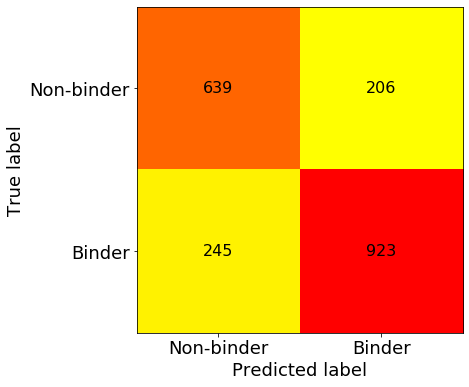

In [5]:
g.plotConfusion(cf, ['Non-binder', 'Binder'])
plt.savefig("Plots/SVM_test_H1N1_EGG.pdf")